In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [37]:
# import data
dataset = pd.read_csv("Position_Salaries.csv")
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [38]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, -1:].values

print(X)
print(X.shape)
print("\n")
print(y)
print(y.shape)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
(10, 1)


[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]
(10, 1)


In [39]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X = sc_X.fit_transform(X)
sc_y = StandardScaler()
y = sc_y.fit_transform(y)
print(X)
print("\n")
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [40]:
# Fitting SVR to the dataset
from sklearn.svm import SVR

regressor = SVR(kernel = "rbf")
regressor.fit(X, y)

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [41]:
# Predicting a new result
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(np.array([[6.5]]))))
print(y_pred[0])

170370.020407


Text(0,0.5,'Salary')

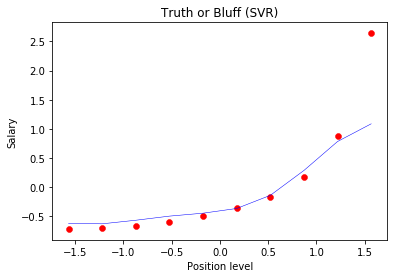

In [42]:
# Visualising the Linear Regression results
plt.scatter(X, y, c = "red", lw = 0.5)
plt.plot(X, regressor.predict(X), c = "blue", lw = 0.5)
plt.title("Truth or Bluff (SVR)")
plt.xlabel("Position level")
plt.ylabel("Salary")

Text(0,0.5,'Salary')

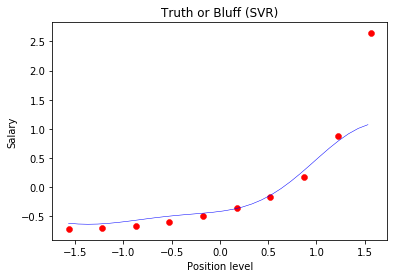

In [43]:
# Visualising the Linear Regression results
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, c = "red", lw = 0.5)
plt.plot(X_grid, regressor.predict(X_grid), c = "blue", lw = 0.5)
plt.title("Truth or Bluff (SVR)")
plt.xlabel("Position level")
plt.ylabel("Salary")